In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, Conv2D, Dense
from tensorflow.keras import layers
import keras.backend as K
import sys
from tensorflow.keras.datasets import cifar10

np.set_printoptions(threshold=sys.maxsize)
gpus = tf.config.experimental.list_physical_devices('XLA_GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'XLA_GPU')

In [17]:
model = keras.applications.NASNetLarge(include_top = False, weights='imagenet')

In [18]:
model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_260 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

# Data load

In [19]:
train = np.load('./data/pre_ok_data/train.npy')
valid = np.load('./data/pre_ok_data/valid.npy')
t_label = np.load('./data/pre_ok_data/t_label.npy')
v_label = np.load('./data/pre_ok_data/v_label.npy')

In [20]:
print('train_shape : ', train.shape, 'label_shape : ', t_label.shape)
print('valid_shape : ', valid.shape, 'label_shape : ', v_label.shape)

train_shape :  (28474, 331, 331, 3) label_shape :  (28474,)
valid_shape :  (3557, 331, 331, 3) label_shape :  (3557,)


In [21]:
from tensorflow.keras.utils import to_categorical

X_train = train.astype('float32') / 255
X_valid = valid.astype('float32') / 255

y_train = to_categorical(t_label)
y_valid = to_categorical(v_label)

print(y_train.shape, y_valid.shape)

(28474, 7) (3557, 7)


In [22]:
print('X_train : ', X_train.shape, 
     'y_train : ', y_train.shape,
     'X_valid : ', X_valid.shape,
     'y_valid : ', y_valid.shape)

X_train :  (28474, 331, 331, 3) y_train :  (28474, 7) X_valid :  (3557, 331, 331, 3) y_valid :  (3557, 7)


In [23]:
from sklearn.utils import class_weight


y_train_ = np.argmax(y_train, axis=1)
weights = class_weight.compute_class_weight('balanced',
                                            np.unique(y_train_),
                                            y_train_)

weights = {i : weights[i] for i in range(7)}

weights

c:\programdata\anaconda3\envs\testpy36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[2 0 3 4 1 3 1 0 5 1 4 1 4 1 5 3 0 0 3 4 1 1 3 0 3 2 0 4 2 4 0 6 0 2 1 3 6
 6 0 1 4 0 0 6 2 1 3 2 1 3 1 6 0 0 1 3 2 6 0 4 0 6 0 6 1 3 0 6 1 2 6 0 4 2
 5 6 2 1 0 1 4 4 3 3 0 0 1 2 4 5 2 1 1 6 3 1 4 1 0 2 0 5 2 2 1 0 1 2 5 4 5
 1 2 6 6 4 1 0 4 1 1 4 2 0 4 0 4 2 4 0 1 0 4 0 1 2 2 2 1 3 1 0 2 2 2 1 4 4
 0 0 2 6 0 0 0 2 1 2 4 0 1 2 0 5 1 4 0 2 3 4 6 4 6 0 0 4 2 4 3 3 1 3 4 1 3
 1 0 4 6 2 4 4 1 1 0 3 1 1 3 3 2 1 3 6 4 3 0 4 3 1 0 5 4 3 0 3 2 1 2 0 1 4
 0 0 3 4 6 0 4 1 3 6 3 4 4 2 5 3 1 1 1 4 4 1 4 0 3 3 4 0 0 1 0 1 1 1 6 1 1
 2 6 5 1 1 4 2 3 1 1 3 0 1 3 2 4 5 1 1 2 3 4 0 4 1 6 0 1 0 1 2 2 4 1 2 1 4
 6 2 1 0 1 3 1 4 6 0 3 4 4 4 2 2 1 6 2 1 4 4 6 2 1 4 5 6 2 2 0 2 1 5 2 4 0
 4 0 5 3 4 5 5 6 4 0 4 5 4 1 1 4 3 4 0 2 2 4 1 6 1 3 0 0 3 0 4 3 1 4 4 1 4
 0 0 2 4 4 2 4 1 0 4 1 1 4 1 2 1 1 0 4 1 1 0 4 1 6 2 5 1 0 2 1 6 0 5 0 2 2
 2 1 1 4 1 2 1 4 1 0 0 1 0 1 0 4 4 1 4 

{0: 0.7985304840428515,
 1: 0.5646466248909336,
 2: 1.010863391082079,
 3: 1.3155608944742192,
 4: 0.8115950290730818,
 5: 2.2699298469387754,
 6: 1.80306484295846}

In [24]:
model.trainable = False

In [25]:
model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_260 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

Total params: 84,916,818
Trainable params: 0
Non-trainable params: 84,916,818
__________________________________________________________________________________________________


In [26]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(7, activation = 'softmax')

models = tf.keras.Sequential([
    model,
    global_average_layer,
    prediction_layer
])

In [27]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d (Gl (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 28231     
Total params: 84,945,049
Trainable params: 28,231
Non-trainable params: 84,916,818
_________________________________________________________________


In [28]:
models.compile(optimizer=tf.keras.optimizers.Adam(decay = 0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

checkpoint_path = "./c_model"

check_p = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_best_only=True)

In [29]:
history = models.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    batch_size = 16,
                    class_weight=weights,
                    callbacks=[early_stopping, check_p])

Epoch 1/100
1780/1780 [==============================] - ETA: 0s - loss: 1.1695 - accuracy: 0.5534WARNING:tensorflow:From c:\programdata\anaconda3\envs\testpy36\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\c_model\assets
1780/1780 [==============================] - 864s 486ms/step - loss: 1.1695 - accuracy: 0.5534 - val_loss: 1.0256 - val_accuracy: 0.6123
Epoch 2/100
1780/1780 [==============================] - 897s 504ms/step - loss: 0.9138 - accuracy: 0.6515 - val_loss: 0.9518 - val_accuracy: 0.6342
Epoch 3/100
1780/1780 [==============================] - 894s 503ms/step -

In [30]:
models = keras.models.load_model('c_model/')

In [31]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d (Gl (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 28231     
Total params: 84,945,049
Trainable params: 84,748,381
Non-trainable params: 196,668
_________________________________________________________________


In [32]:
X_test = np.load('./data/pre_ok_data/test.npy')
y_test = np.load('./data/pre_ok_data/s_label.npy')

In [33]:
from keras.utils import to_categorical

X_test = X_test.astype('float32') / 255
y_test = to_categorical(y_test)

In [34]:
test_loss, test_acc = models.evaluate(X_test, y_test)

112/112 [==============================] - 82s 728ms/step - loss: 0.7432 - accuracy: 0.7326


In [35]:
print('test_loss : ', test_loss, 'test_acc : ', test_acc)

test_loss :  0.7432323098182678 test_acc :  0.7326398491859436


In [36]:
prediction = models.predict(X_test)

In [37]:
prediction_max = np.argmax(prediction, axis = 1)

In [38]:
real_label = np.argmax(y_test, axis = 1)

In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(real_label, prediction_max)

classes = ['1', '2', '3', '4', '5', '6', '7']

for i in range(len(cf)):
    print(classes[i], ' class confusion matrix : ', cf[i])

1  class confusion matrix :  [396  20  55  58  70  22  15]
2  class confusion matrix :  [ 21 840  13   3  11   8   4]
3  class confusion matrix :  [ 26   4 388  46  23   8   8]
4  class confusion matrix :  [ 32   2  61 248  33   9   1]
5  class confusion matrix :  [116  31  78  61 301  27  12]
6  class confusion matrix :  [  4   3   9  15  17 175   1]
7  class confusion matrix :  [  2   4   9   2   7   0 258]


In [ ]:
y_score = prediction

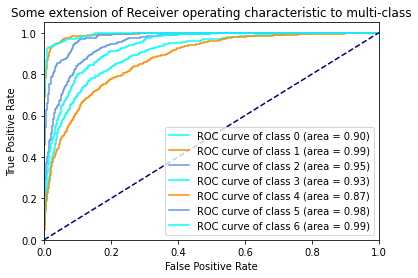

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test.ravel(), y_score.ravel())


# Plot all ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i],
             color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],
         color='navy', linestyle='--')

# # Compute macro-average ROC curve and ROC area
# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))
# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(7):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# # Finally average it and compute AUC
# mean_tpr /= 7
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')
# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {:0.2f})'.format(roc_auc["macro"]), color='navy', linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [42]:
models.save('NasNet_models/')

INFO:tensorflow:Assets written to: NasNet_models/assets
